## **Student_Score_Prediction**

In [2]:
# Simple Linear Regression – Predict Student Scores

#1 Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
#2 Load Dataset from CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Students Performance .csv') # set path A/c to your file
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [7]:
#3 Check dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          145 non-null    object
 1   Student_Age         145 non-null    object
 2   Sex                 145 non-null    object
 3   High_School_Type    145 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     145 non-null    object
 6   Sports_activity     145 non-null    object
 7   Transportation      145 non-null    object
 8   Weekly_Study_Hours  145 non-null    int64 
 9   Attendance          145 non-null    object
 10  Reading             145 non-null    object
 11  Notes               145 non-null    object
 12  Listening_in_Class  145 non-null    object
 13  Project_work        145 non-null    object
 14  Grade               145 non-null    object
dtypes: int64(1), object(14)
memory usage: 17.1+ KB
None
       Weekly_Study_Ho

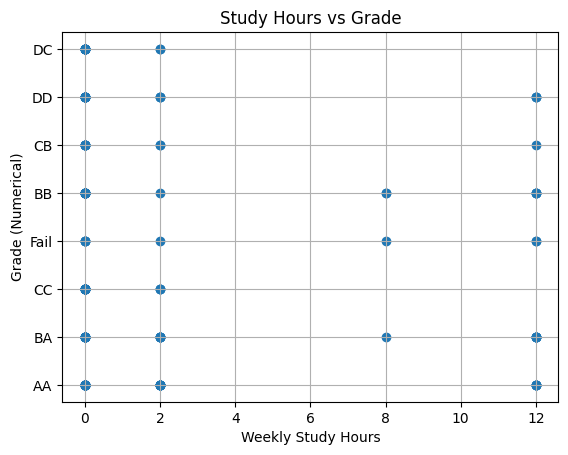

In [9]:
#4 ✖️ Step 4: Data Visualization
plt.scatter(df['Weekly_Study_Hours'], df['Grade'], label='Actual data')
plt.title("Study Hours vs Grade")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Grade (Numerical)")
plt.grid(True)
plt.show()

In [10]:
# Preprocessing: Convert 'Grade' to numerical values
# Assuming 'No' maps to 0 and 'AA' maps to 1 for a simple binary outcome.
# If there are more grades, this mapping might need to be expanded.
df['Grade'] = df['Grade'].map({'No': 0, 'AA': 1}).fillna(0) # Handle potential NaN if 'Grade' has other values not in map

#5: Split Data into Train/Test
X = df[['Weekly_Study_Hours']]      # Input feature
y = df['Grade']        # Output variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
#6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Training Completed Successfully!")


Training Completed Successfully!


In [12]:
#7: Model Coefficients
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): 0.0033630573248407724
Intercept: 0.26838216560509554


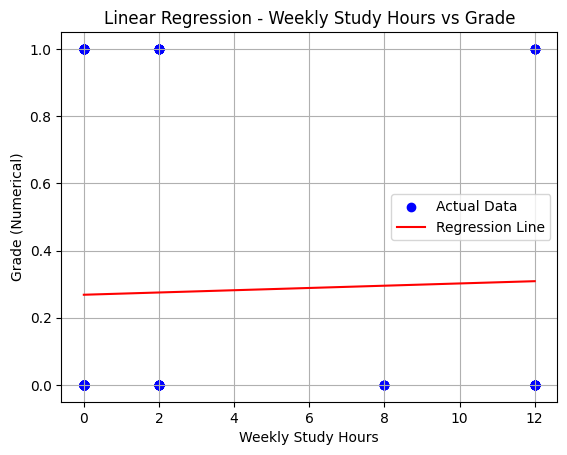

In [13]:
#8: Plot Regression Line
# Ensure X for plotting purposes spans the range of Weekly_Study_Hours
min_hours = df['Weekly_Study_Hours'].min()
max_hours = df['Weekly_Study_Hours'].max()
X_plot = pd.DataFrame({'Weekly_Study_Hours': np.linspace(min_hours, max_hours, 100)})
line = model.predict(X_plot)

plt.scatter(df['Weekly_Study_Hours'], df['Grade'], color='blue', label='Actual Data')
plt.plot(X_plot, line, color='red', label='Regression Line')
plt.title("Linear Regression - Weekly Study Hours vs Grade")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Grade (Numerical)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#9: Predict on Test Data
y_pred = model.predict(X_test)

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
69,0.0,0.268382
140,0.0,0.268382
27,1.0,0.268382
19,0.0,0.275108
42,1.0,0.268382
117,1.0,0.268382
126,0.0,0.308739
108,0.0,0.275108
84,0.0,0.308739
18,0.0,0.308739


In [15]:
#10: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 0.3255804963760157
Mean Squared Error (MSE): 0.1252354593947296
Root Mean Squared Error (RMSE): 0.35388622379901935
R2 Score: -0.35029514552522545


In [19]:
#11: Make a Custom Prediction
hours = float(input("Enter study hours: "))
prediction = model.predict([[hours]])

print(f"\n 📘 Predicted Score for {hours} hours = {prediction[0]:.2f}")


Enter study hours: 10

 📘 Predicted Score for 10.0 hours = 0.30


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
